In [4]:
import pandas as pd

In [5]:
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt


In [6]:
#load the data as string

js = json.load((open('data/world_bank_projects.json')))
new_js = json_normalize(js)

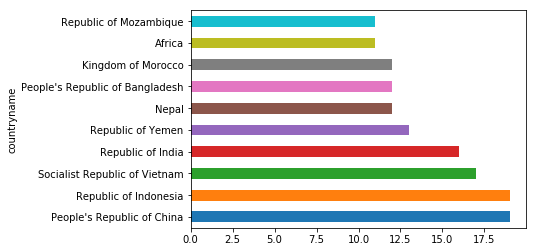

In [7]:
#Find Top 10 Countries
groupbycountry = new_js.groupby(['countryname']).size().sort_values(ascending=False).head(10) #.count().sort_values('_id.$oid',ascending=False)
#print(groupbycountry)

groupbycountry.plot(kind='barh')
plt.show()

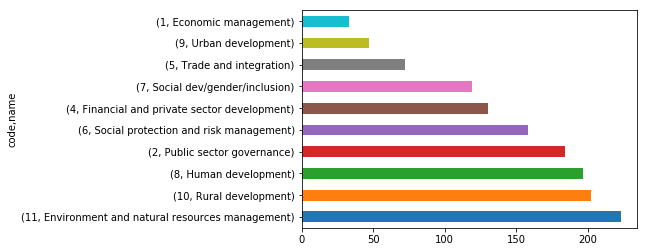

In [81]:
#Top 10 Project Themes
prg = json_normalize(js, 'mjtheme_namecode', ['_id', 'countrycode', 'countryname'])

groupbyprj = prg.groupby(['code', 'name']).size().sort_values(ascending=False).head(10)
groupbyprj.plot(kind='barh')
plt.show()

In [113]:
#Fill missing theme names by creating a codelist of theme names as replacement
codelist = json_normalize(js, 'mjtheme_namecode')
codelist1 = codelist[codelist['name'] != ''].drop_duplicates('name')

no_empty = pd.merge(prg, codelist1, on='code')
del no_empty['name_x']
no_empty.columns = ['themecode', 'id', 'countrycode', 'countryname', 'themename'
print(no_empty[no_empty['themename'] == ''])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499 entries, 0 to 1498
Data columns (total 5 columns):
themecode      1499 non-null object
id             1499 non-null object
countrycode    1499 non-null object
countryname    1499 non-null object
themename      1499 non-null object
dtypes: object(5)
memory usage: 70.3+ KB
Empty DataFrame
Columns: [themecode, id, countrycode, countryname, themename]
Index: []
